In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
from fun import *
import scipy.sparse.linalg as sp
from scipy.sparse import csc_matrix
import pandas as pd

In [3]:
# @njit
# def generateMatrix(Nx,Ny,dx,dy,n,k):
#     def idx1D(i , j, N):
#         return i * N + j

#     temp = np.zeros((Nx*Ny,Ny*Nx))

#     for i in range(Nx):
#         for j in range(Ny):
#             temp[idx1D(i, j, Ny), idx1D(i, j, Ny)] = -2/dx**2 -2/dy**2 + k**2/n[i,j]**2

#     for i in range(Nx):
#         for j in range(1,Ny):
#             temp[idx1D(i, j, Ny), idx1D(i, j - 1, Ny)] = 1/dy**2

#     for i in range(Nx):
#         for j in range(Ny-1):
#             temp[idx1D(i, j, Ny), idx1D(i, j + 1, Ny)] = 1/dy**2

#     for i in range(Nx-1):
#         for j in range(Ny):
#             temp[idx1D(i, j, Ny), idx1D(i + 1, j, Ny)] = 1/dx**2

#     for i in range(1,Nx):
#         for j in range(Ny):
#             temp[idx1D(i, j, Ny), idx1D(i - 1, j, Ny)] = 1/dx**2
#     return temp

# @njit
# def pinv(matrix):
#     return np.linalg.pinv(matrix) 

# def matmul(M1,M2):
#     return np.matmul(M1, M2)

In [4]:
@njit
def generateMatrix(Nx,Ny,dx,dy,n,k):
    def idx1D(i , j, N):
        return i * N + j

    # temp = np.zeros((Nx*Ny,Ny*Nx))
    temp_x = []
    temp_y = []
    temp_var = []

    for i in range(Nx):
        for j in range(Ny):
            # temp[idx1D(i, j, Ny), idx1D(i, j, Ny)] = -2/dx**2 -2/dy**2 + k**2/n[i,j]**2
            temp_x.append(idx1D(i, j, Ny))
            temp_y.append(idx1D(i, j, Ny))
            temp_var.append(-2/dx**2 -2/dy**2 + k**2/n[i,j]**2)

    for i in range(Nx):
        for j in range(1,Ny):
            # temp[idx1D(i, j, Ny), idx1D(i, j - 1, Ny)] = 1/dy**2
            temp_x.append(idx1D(i, j, Ny))
            temp_y.append(idx1D(i, j-1, Ny))
            temp_var.append(1/dy**2)

    for i in range(Nx):
        for j in range(Ny-1):
            # temp[idx1D(i, j, Ny), idx1D(i, j + 1, Ny)] = 1/dy**2
            temp_x.append(idx1D(i, j, Ny))
            temp_y.append(idx1D(i, j+1, Ny))
            temp_var.append(1/dy**2)

    for i in range(Nx-1):
        for j in range(Ny):
            # temp[idx1D(i, j, Ny), idx1D(i + 1, j, Ny)] = 1/dx**2
            temp_x.append(idx1D(i, j, Ny))
            temp_y.append(idx1D(i+1, j, Ny))
            temp_var.append(1/dx**2)

    for i in range(1,Nx):
        for j in range(Ny):
            # temp[idx1D(i, j, Ny), idx1D(i - 1, j, Ny)] = 1/dx**2
            temp_x.append(idx1D(i, j, Ny))
            temp_y.append(idx1D(i-1, j, Ny))
            temp_var.append(1/dx**2)

    return temp_var, temp_x, temp_y

generating matrix...
inverting sparse matrix...
reshaping matrix...
(6561, 6561)
multiplication...
reshaping result...
(6561,)
generate img...
saving img...


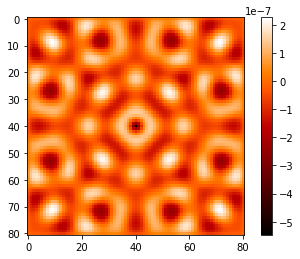

In [9]:
Ny = 81
Nx = 81

dx = 0.001
dy = 0.001
k = 6.28/0.012 #2pi/długość fali
n = np.ones((Nx,Ny))
f = np.zeros((Nx*Ny))
f[(Nx*Ny)//2] = 1
E_2D_test = np.zeros((Nx,Ny))

print('generating matrix...')
var, coordinates_x, coordinates_y = generateMatrix(Nx,Ny,dx,dy,n,k)
matrix_sparse = csc_matrix((var,(coordinates_x, coordinates_y)))


print('inverting sparse matrix...')
matrix_inv_sparse = sp.inv(
    matrix_sparse
    )

print('reshaping matrix...')
print(np.shape(matrix_inv_sparse.toarray()))

print('multiplication...')
E_test = matrix_inv_sparse.dot(f)

print('reshaping result...')
print(np.shape(E_test))

E_2D_test = np.reshape(E_test,(Nx,Ny))
print('generate img...')

plt.imshow(E_2D_test, 'gist_heat')
plt.colorbar()
print('saving img...')
plt.savefig('test_4.png')



generating matrix...
pseudoinverting matrix...
reshaping matrix...
(1681, 1681)
multiplication...
reshaping result...
(1681,)
generate img...
saving img...


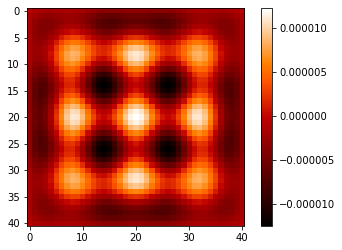

In [112]:
Ny = 41
Nx = 41

dx = 0.001
dy = 0.001
k = 6.28/0.012 #2pi/długość fali
n = np.ones((Nx,Ny))
f = np.zeros((Nx*Ny))
f[(Nx*Ny)//2] = 1
E_2D_test = np.zeros((Nx,Ny))

print('generating matrix...')
matrix = generateMatrix(Nx,Ny,dx,dy,n,k)

print('pseudoinverting matrix...')
matrix_inv = pinv(matrix)         # Pseudoinverse

print('reshaping matrix...')
print(np.shape(matrix_inv_sparse.toarray()))

print('multiplication...')
E_test = matmul(matrix_inv_sparse.toarray(), f)

print('reshaping result...')
print(np.shape(E_test))

E_2D_test = np.reshape(E_test,(Nx,Ny))#[:(Nx-Ny)]
print('generate img...')

plt.imshow(E_2D_test, 'gist_heat')
# plt.imshow(matrix, 'gist_heat')
plt.colorbar()
print('saving img...')
plt.savefig('test_5.png')



